# Колебания струны со свободным концом

### Импорт модулей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%matplotlib inline

### Начальные параметры

In [35]:
L = 1
dX = 0.1
dT = 0.05
a = 0.8
m = 200

### Уравнение колебания струны (случай 1)

In [39]:
def oscillation_equation(L=1, dX=0.1, dT=0.05, a=1, *, m=6) -> List[List[float]]:
    """ Метод сеток для решения уравнения колебания струны
        
        :param L: длина струны
        :type L: float
        :param dX: длина шага по оси X
        :type dX: float
        :param dT: длина шага по оси T
        :type dT: float
        :param a: ускорение
        :type a: float
        :param m: количество кривых (с выбранным шагом dT)
        :type m: int
        
        :return: матрица, в которой показано решение уравнения колебания струны
        :rtype: List[List[float]]
    """
    n = int(L/dX) + 1
    coef1 = 1-(a**2*dT**2/dX**2)
    coef2 = a**2*dT**2/dX**2
    u = np.zeros((n,m))
    u[0,:] = 0
    for x in range(1, n-1):
        u[x,0] = x*dX*x*dX
    for t in range(1, m):
        for x in range(1, n-1):
            u[x,t] = u[x,t-1]*2*coef1+coef2*(u[x+1,t-1]+u[x-1,t-1])-u[x,t-2]
        u[n-1,t] = u[n-2,t-1]
    return u

In [4]:
oscillation_equation()[:,0]

array([0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ])

In [5]:
oscillation_equation()[:,1]

array([0.   , 0.175, 0.315, 0.415, 0.475, 0.495, 0.475, 0.415, 0.315,
       0.175, 0.09 ])

### Графики

In [6]:
# help(oscillation_equation)

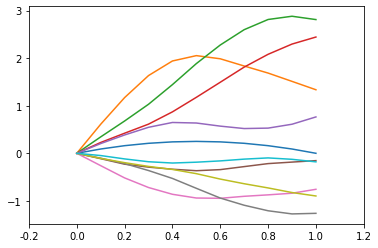

In [7]:
plt.plot(oscillation_equation(L, dX, dT, a, m=m)[:,::10][:,0:10])
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

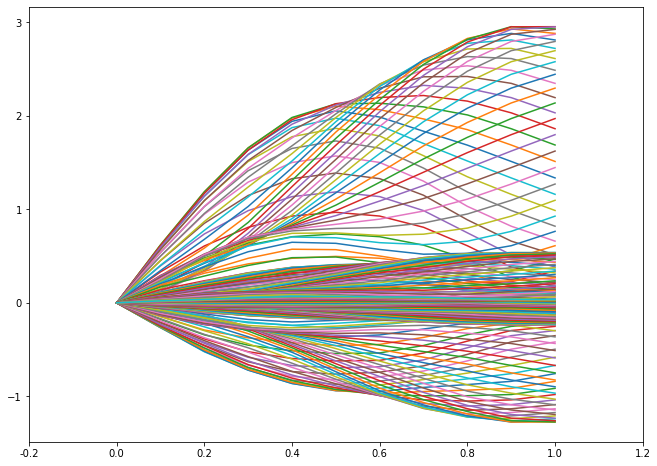

In [8]:
plt.plot(oscillation_equation(L, dX, dT, a, m=m))
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

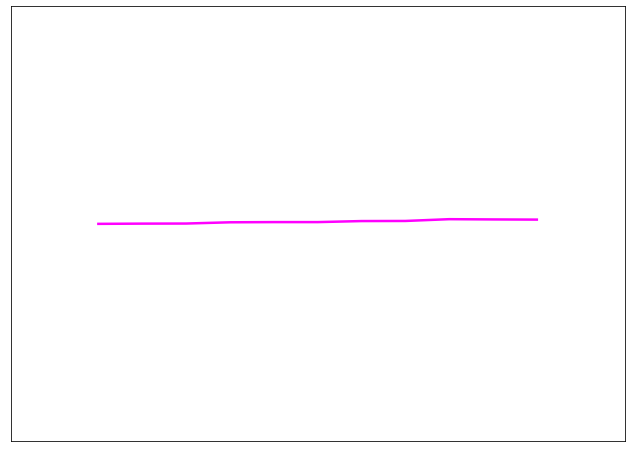

In [40]:
fig = plt.figure()
ax = plt.axes(xlim=(-2,12), ylim=(-4,4))
points = oscillation_equation(L, dX, dT, a, m=m) 

labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.rcParams["axes.facecolor"] = "white"

def animate(i):
    fig.clear()
    ax = plt.axes(xlim=(-2,12), ylim=(-8,8))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return plt.plot(points[:,i], linewidth=2.5, color="magenta")

anim = animation.FuncAnimation(fig, animate, frames=range(0,m,9), interval=50, blit=True)

HTML(anim.to_jshtml())

### Уравнение колебания струны (случай 2)

In [10]:
def oscillation_equation1(L=1, dX=0.1, dT=0.05, a=1, *, m=6) -> List[List[float]]:
    """ Метод сеток для решения уравнения колебания струны
        
        :param L: длина струны
        :type L: float
        :param dX: длина шага по оси X
        :type dX: float
        :param dT: длина шага по оси T
        :type dT: float
        :param a: ускорение
        :type a: float
        :param m: количество кривых (с выбранным шагом dT)
        :type m: int
        
        :return: матрица, в которой показано решение уравнения колебания струны
        :rtype: List[List[float]]
    """
    n = int(L/dX) + 1
    coef1 = 1-(a**2*dT**2/dX**2)
    coef2 = a**2*dT**2/dX**2
    u = np.zeros((n,m))
    u[n-1,:] = 0
    for x in range(1, n-1):
        u[x,0] = x*dX*(1-x*dX)
    for t in range(1, m):
        for x in range(1, n-1):
            u[x,t] = u[x,t-1]*2*coef1+coef2*(u[x+1,t-1]+u[x-1,t-1])-u[x,t-2]
        u[0,t] = u[1,t-1]
    return u

In [11]:
oscillation_equation1()[:,0]

array([0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ])

In [12]:
oscillation_equation1()[:,1]

array([0.09 , 0.175, 0.315, 0.415, 0.475, 0.495, 0.475, 0.415, 0.315,
       0.175, 0.   ])

### Графики

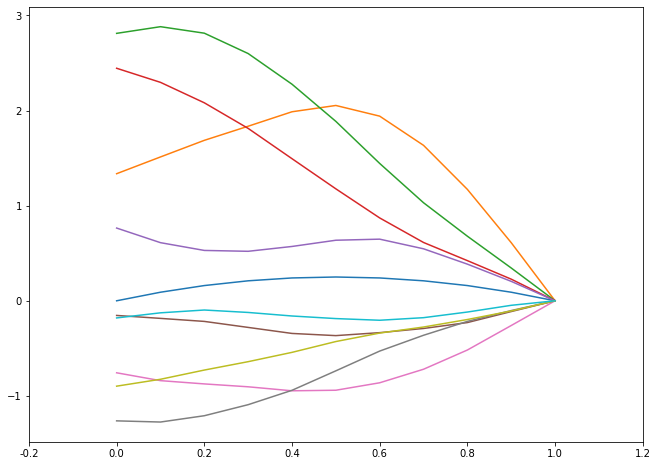

In [13]:
plt.plot(oscillation_equation1(L, dX, dT, a, m=m)[:,::10][:,0:10])
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

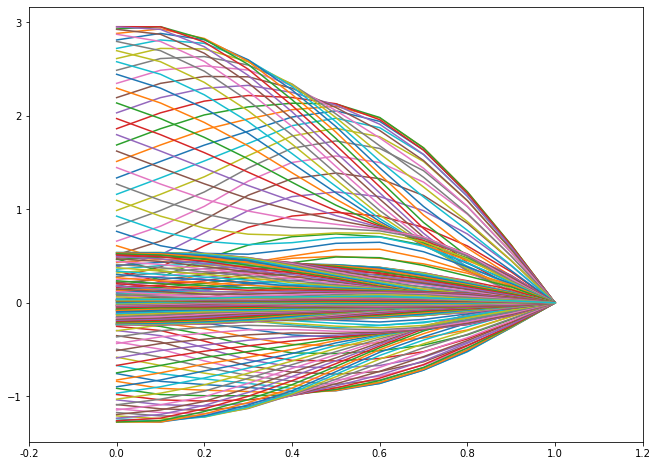

In [14]:
plt.plot(oscillation_equation1(L, dX, dT, a, m=m))
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

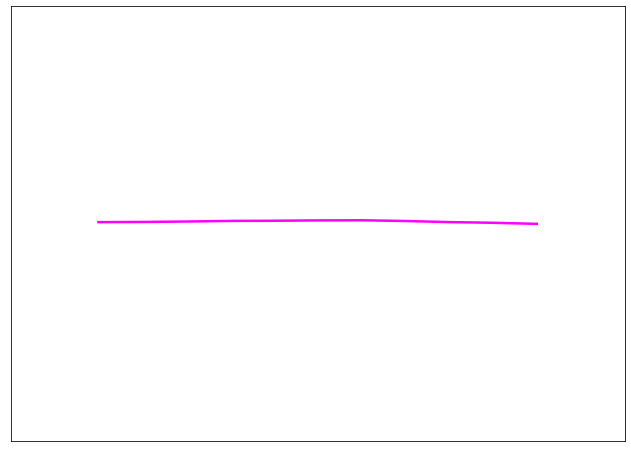

In [15]:
fig = plt.figure()
ax = plt.axes(xlim=(-2,12), ylim=(-4,4))
points = oscillation_equation1(L, dX, dT, a, m=m) 

labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.rcParams["axes.facecolor"] = "white"

def animate(i):
    fig.clear()
    ax = plt.axes(xlim=(-2,12), ylim=(-4,4))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return plt.plot(points[:,i], linewidth=2.5, color="magenta")

anim = animation.FuncAnimation(fig, animate, frames=range(0,m,9), interval=50, blit=True)

HTML(anim.to_jshtml())

### Уравнение колебания струны с закрепленными концами

In [16]:
def oscillation_equation2(L=1, dX=0.1, dT=0.05, a=1, *, m=6) -> List[List[float]]:
    """ Метод сеток для решения уравнения колебания струны
        
        :param L: длина струны
        :type L: float
        :param dX: длина шага по оси X
        :type dX: float
        :param dT: длина шага по оси T
        :type dT: float
        :param a: ускорение
        :type a: float
        :param m: количество кривых (с выбранным шагом dT)
        :type m: int
        
        :return: матрица, в которой показано решение уравнения колебания струны
        :rtype: List[List[float]]
    """
    n = int(L/dX) + 1
    coef1 = 1-(a**2*dT**2/dX**2)
    coef2 = a**2*dT**2/dX**2
    u = np.zeros((n,m))
    u[0,:] = 0
    u[n-1,:] = 0
    for x in range(1, n-1):
        u[x,0] = x*dX*(1-x*dX)
    for x in range(1, n-1):
        u[x,1] = u[x,0]
    for t in range(2, m):
        for x in range(1, n-1):
            u[x,t] = u[x,t-1]*2*coef1+coef2*(u[x+1,t-1]+u[x-1,t-1])-u[x,t-2]
    return u

In [17]:
oscillation_equation2()[:,0]

array([0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ])

In [18]:
oscillation_equation2()[:,1]

array([0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ])

### Графики

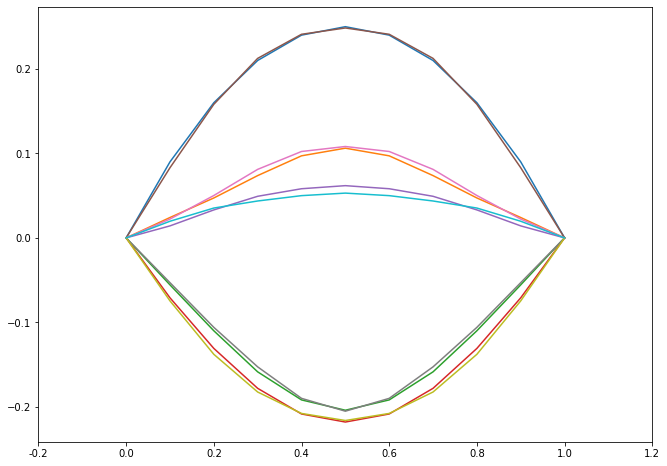

In [19]:
plt.plot(oscillation_equation2(L, dX, dT, a, m=500)[:,::10][:,0:10])
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

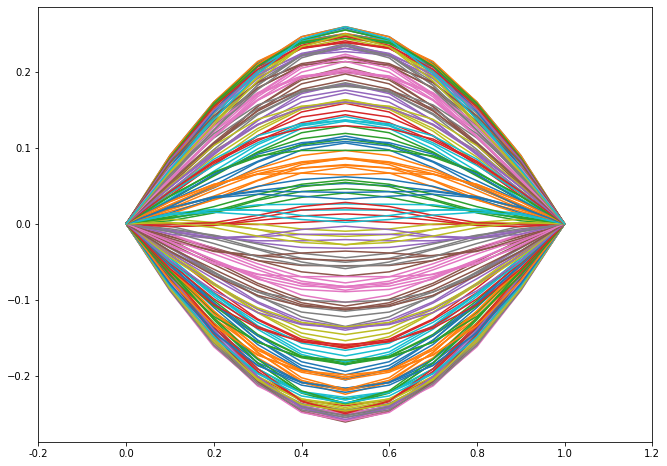

In [20]:
plt.plot(oscillation_equation2(L, dX, dT, a, m=200))
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

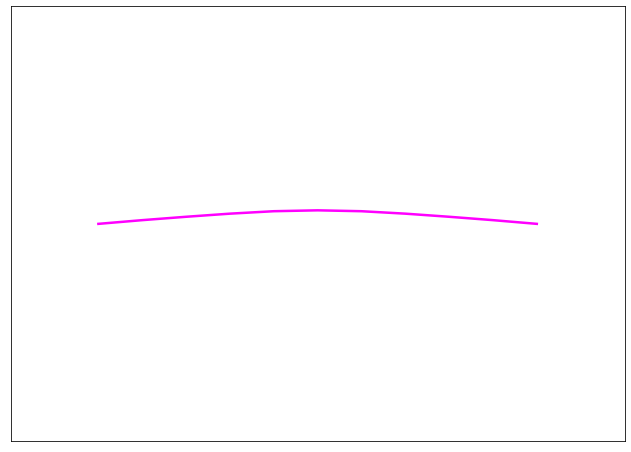

In [21]:
fig = plt.figure()
ax = plt.axes(xlim=(-2,12), ylim=(-4,4))
points = oscillation_equation2(L, dX, dT, a, m=200) 

labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.rcParams["axes.facecolor"] = "white"

def animate(i):
    fig.clear()
    ax = plt.axes(xlim=(-2,12), ylim=(-4,4))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return plt.plot(points[:,i], linewidth=2.5, color="magenta")

anim = animation.FuncAnimation(fig, animate, frames=range(0,m,9), interval=50, blit=True)

HTML(anim.to_jshtml())